In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import InceptionResNetV2

In [2]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [3]:
model = load_model('./models/object_detection.h5')

C:\Users\Nemanja\anaconda3\lib\site-packages\keras\layers\core\lambda_layer.py:325: UserWarning: tensorflow.python.keras.applications.inception_resnet_v2 is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(


In [4]:
image = load_img('./test_images/Test9.jpeg')
image = np.array(image,dtype=np.uint8)
image1 = load_img('./test_images/Test9.jpeg',target_size = (224,224))
image_arr = img_to_array(image1)/255.0

In [5]:
image.shape

(350, 460, 3)

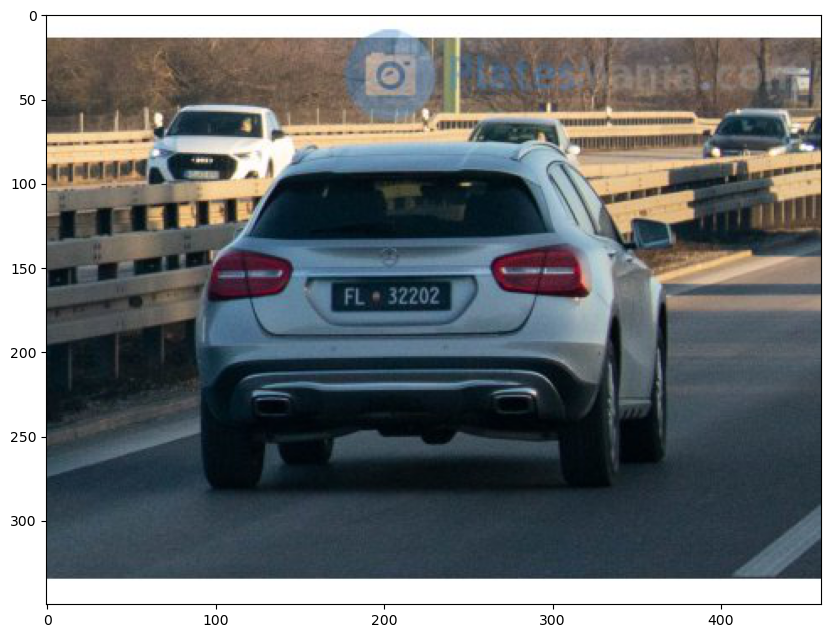

In [6]:
plt.figure(figsize = (10,8))
plt.imshow(image)
plt.show()

In [7]:
image_arr.shape

(224, 224, 3)

In [8]:
predicting_array = image_arr.reshape(1,224,224,3)
predicting_array.shape

(1, 224, 224, 3)

In [9]:
coordinates = model.predict(predicting_array)
coordinates

1/1 [==============================] - 3s 3s/step


array([[0.40558887, 0.53363144, 0.4516133 , 0.54092413]], dtype=float32)

In [10]:
h,w,d = image_arr.shape

In [11]:
true_values = np.array([w,w,h,h])
coordinates = coordinates * true_values
coordinates

array([[ 90.85190582, 119.53344345, 101.16138077, 121.16700554]])

In [12]:
coordinates = coordinates.astype(np.int32)
coordinates

array([[ 90, 119, 101, 121]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(90, 101) (119, 121)


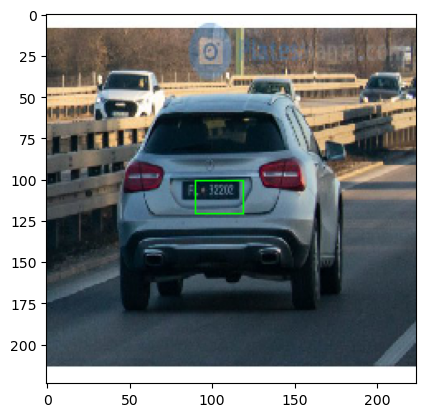

In [13]:
x1,x2,y1,y2 = coordinates[0]
leftcorner = (x1,y1)
rightcorner = (x2,y2)
print(leftcorner,rightcorner)
cv2.rectangle(image_arr,leftcorner,rightcorner,(0,255,0),1)
plt.imshow(image_arr)
plt.show()